In [83]:
# To do list:
# Figure out how to get the indices of the sunset and sunrise for each day
# Using those indices, get the times for all the times (inclusive) between those intervals
# Using the times, get a list of indices of each day and put in a list of lists

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style','default')
import sys

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

%matplotlib inline 
from datetime import datetime 

In [85]:
location = '/Users/gabriellachen/Desktop/Millsboro-Pond/Millsboro_Pond.csv'
df = pd.read_csv(location)

In [86]:
#Makes a list of the datetime objects
def get_datetime(column,df):
    dates = []
    for i in df[column]:
        date = datetime.strptime(i, '%m/%d/%Y %H:%M:%S')
        dates.append(date)
    
    return dates

dates = get_datetime('Date',df)

In [87]:
#Makes a new column of datetime objects 
df['Datetime'] = dates
length = len(df['Datetime'])
df[:1]

,Date,SID,DO,NH4,NO3,PH,PO4,SC,TE,TU,...,DO_Sat_mgL,DO_%Sat,DO Anomaly,Deficit,dCdt,Month,Day,Week,Light,Datetime
0,12/21/2005 21:30:00,1231,11.88,NaN,NaN,5.5,NaN,128,5,4,...,12.766354,93.06%,-0.88635,0.886354,NaN,12,21,51,N,2005-12-21 21:30:00


In [88]:
#Return the indices of locations with consecutive negative numbers (this is to pick out intervals with negative 
# rates of change
def get_nums(column,df):
    negative_nums = []
    length = len(df[column])
    
    for x in range(length):
        if pd.isnull(df[column][x]):
            continue
        elif (length-1) - x >= 4:
            if float((df[column][x])) < 0 and float(df[column][x+1]) < 0 and float(df[column][x+2]) < 0 and float(df[column][x+3]) < 0 and float(df[column][x+4]) < 0:
                negative_nums.append(x)
                
    return negative_nums

neg_indices = get_nums('dCdt',df)

In [89]:
#Defines Summer as June, July, and August 
def is_Summer(column,df):
    indices = []
    for i in range(len(df[column])):
        if df[column][i].month > 5 and df[column][i].month < 9:
            indices.append(i)
            
    return indices

summer_indices = is_Summer('Datetime',df)
summer_indices[:4]

[3407, 3408, 3409, 3410]

In [90]:
#Defines Fall as September, October, and November 
def is_Fall(column,df):
    indices = []
    for i in range(len(df[column])):
        if df[column][i].month > 8 and df[column][i].month < 12:
            indices.append(i)
            
    return indices

fall_indices = is_Fall('Datetime',df)

In [91]:
#Defines Winter as December, January, and February 
def is_Winter(column,df):
    indices = []
    for i in range(len(df[column])):
        if df[column][i].month > 0 and df[column][i].month < 3:
            indices.append(i)
            
    return indices

winter_indices = is_Winter('Datetime',df)

In [92]:
#Defines Spring as March, April, and May 
def is_Spring(column,df):
    indices = []
    for i in range(len(df[column])):
        if df[column][i].month > 2 and df[column][i].month < 6:
            indices.append(i)
            
    return indices

spring_indices = is_Spring('Datetime',df)

In [93]:
#This is supposed to output a list of indices when the sun sets and a list of
#indices when the sun rises. 

sunset = []
sunrise = []

for i in range(length):
    
    if i > 1 or i < (length-1):
        if df['Light'][i] == 'N' and df['Light'][i-1] == 'Y':
            sunset.append(i)
        if df['Light'][i] == 'N' and df['Light'][i+1] == 'Y':
            sunrise.append(i)
        else:
            continue
    else:
        break


KeyError: -1

In [ ]:
# This should create a list of tuples each with the indices of when the night begins and ends for each day.
# Attempting to output: [ (200,207), (217,225), (340,348)...etc]

def night_interval(sunset,sunrise):
    assert len(sunset) == len(sunrise)
    
    result_list = []
    
    for i in range(len(sunset)):
        x = sunset[i]
        y = sunrise[i]
    
        assert len(x) == len(y)
        
        result_list += [zip(x, y)]
        
    return result_list
night_intervals = night_interval(sunset,sunrise) 

In [ ]:
# Returns a list of all the indices between the indices, incluing the start and end indices
# Attempting to output: [ [200,201,202,203,204,205,206,207], [217,218,219,220,221,222,223,224,225]...etc ]

def nighttime_index(night_intervals):
    # Remember night_intervals equals just a list of tuples >>> example: [(1,7), (16,24)...etc]
    
    indices = []
    temp = []
    for i in night_intervals:
        for x in range(i[1]+1):
            if x >= i[0]:
                temp.append(x)
        indices.append(temp)
        temp = []
            
    return indices

indices = nighttime_index(night_intervals)

In [ ]:
#Returns a list of lists of deficit values for each night
def get_Deficit(indices,column1,df):
    
    # Remember indices will be a list of sublists; For example: indices = [ [200,201,202,203,204,205,206,207]...etc ]
    x_Deficits = []
    temp = []
    for i in indices:
        for x in i:
            temp.append(df[column1][x])
            
        x_Deficits.append(temp)
        temp = []
        
    return x_Deficits

x_Deficits = get_Deficit(indices,'Deficit',df)

print x_Deficits[:1]

In [81]:
#Returns a list of lists of rate-of-change values for each night
def get_ROC(indices,column2,df):
    y_ROC = []
    temp = []
    for i in indices:
        for x in i:
            temp.append(df[column2][x])
            
        y_ROC.append(temp)
        temp = []
        
    return y_ROC


y_ROC = get_ROC(indices,'dCdt',df)
print y_ROC[:1]

[]


In [82]:
def kill_repeats(ls):
    length = len(ls)
    repeats = []
    for i in range(length-1):
        if ls[i] + 1 == ls[i+1]:
            repeats.append(ls[i+1])

    for i in repeats:
        ls.remove(i)

    return ls

In [64]:
#Returns a list of all the indices satisfying the requirments: 5 consecutive, during summer
def get_points(column1, column2, df):
    neg_indices = get_nums(column2,df)
    summer_indices = is_Summer(column1,df)

    ls = []
    for x in neg_indices:
        if x in summer_indices:
                ls.append(x)
    return ls

ls = get_points('Datetime','dCdt',df)
ls = kill_repeats(ls)


In [50]:
#Returning a list of all the indices with positive deficits because we need positive anomaly
def pos_deficit(ls,column,df):
    pos = []
    for i in ls:
        if df[column][i] > 0:
            pos.append(i)      
    return pos 

indices = pos_deficit(ls,'Deficit',df)
print indices

[3478, 3500, 3770, 3830, 3850, 3899, 4075, 4665, 4953, 5014, 9850, 10868, 23716, 23752, 23793, 23856, 25671, 30701]


In [65]:
#Create a visualization for the indices, so I can know which date/Time I'm on
#in the subsequent functions 
def indices_num(indices):
    indices_num = []
    nums = []
    
    for i in range(len(indices)): 
        nums.append(i)
    
    current = 0
    for i in indices:
        if current < len(indices):
            zipped = indices[current],nums[current]
            indices_num.append(zipped)
            current += 1 
        else:
            break
            
    return indices_num

print indices_num(indices)

[(3478, 0), (3500, 1), (3770, 2), (3830, 3), (3850, 4), (3899, 5), (4075, 6), (4665, 7), (4953, 8), (5014, 9), (9850, 10), (10868, 11), (23716, 12), (23752, 13), (23793, 14), (23856, 15), (25671, 16), (30701, 17)]


In [66]:
#Returns a list of all the Deficit values 
def get_x(indices,column1,df):
    x_Deficits = []
    
    for i in indices:
        x_Deficits.append( [df[column1][i],df[column1][i+1], df[column1][i+2], df[column1][i+3], df[column1][i+4]] )
    
    return x_Deficits

x_Deficits = get_x(indices,'Deficit',df)
print x_Deficits[:1]

[[2.249031215, 2.4578011549999998, 2.6533894990000002, 3.1504729619999998, 3.6321295419999999]]


In [71]:
#Returns a list of all the ROC values 
def get_y(indices,column2,df):
    y_ROC = []
    
    for i in indices:
        y_ROC.append( [df[column2][i],df[column2][i+1], df[column2][i+2], df[column2][i+3], df[column2][i+4]] )
        
    return y_ROC

y_ROC = get_y(indices,'dCdt',df)
print y_ROC[:1]

[[-0.519999981, -0.23999977100000003, -0.179999828, -0.45000028600000003, -0.44999980899999997]]


In [72]:
def create_dataset(x_Deficits,y_ROC):
    assert len(x_Deficits) == len(y_ROC)
    
    result_list = []
    
    for i in range(len(x_Deficits)):
        x = x_Deficits[i]
        y = y_ROC[i]
    
        assert len(x) == len(y)
        
        result_list += [zip(x, y)]
        
    return result_list

data_set = create_dataset(x_Deficits,y_ROC) 

In [73]:
#Create a list of dataframes using the datasets 
#tuples refers to a list of datasets 

def create_df(data_set):
    data_frames = []
    for i in range(len(data_set)):
        data_frames.append(pd.DataFrame(data=data_set[i],columns=['Deficit','dCdt']))
    return data_frames 

data_frames = create_df(data_set)

In [74]:
#Creates fitted models for each of the dataframes
def create_models(data_frames):
    lm = []
    for i in range(len(data_frames)):
        lm.append(smf.ols(formula= 'dCdt ~ Deficit', data=data_frames[i]).fit())
        
    return lm

models = create_models(data_frames)

In [75]:
#Returns info for each model 
def get_models_info(models):
    params = []
    
    for i in models:
        params.append(i.params)
        
    return params 
        
params = get_models_info(models)
print params[0]

Intercept   -0.177096
Deficit     -0.067491
dtype: float64


In [76]:
#Intercepts are located at index 0 of params list 
def get_intercepts(params):
    intercepts = []
    
    for i in params:
        intercepts.append(i[0])
    
    return intercepts

#Intercepts equals a list of all the respiration rates 
intercepts = get_intercepts(params)
print set(intercepts)

set([0.025448134059650518, 0.13134599878822067, 0.30283394819941084, -0.27629808144163726, -0.086541730306087472, -0.17709628354780393, -0.13665545213788283, -0.45574670704808373, -1.2019139407961537, -0.10715229720913921, -0.46884329975523875, 0.41574823549931517, 0.0096554557498025675, -0.92298269667968369, 0.52321352253971365, 0.21225754856771295, 0.94094267274125809, -0.26392616395157142])


In [77]:
#K coefficients are located at index 1 of params list 
def get_Kcoeff(params):
    Kcoeff = []
    for i in params:
        Kcoeff.append(i[1])
    
    return Kcoeff

# Kcoeff equals a list of all the gas-exchange coefficients
Kcoeff = get_Kcoeff(params)
print set(Kcoeff)

set([-0.15437388957693843, -0.069909823999324161, 0.26534932190229266, 0.15119547474296091, -0.033126544943416304, -0.37092704142273225, -0.17829823758473984, 0.1186415653176429, -0.06749134628888169, -0.078042250032198932, -0.18954643071842187, -0.069168408394361891, -0.1026247356868665, -0.14082360616811521, 0.24670035280833685, 0.17630283505257632, 0.40483237767050873, -0.18806980194027062])


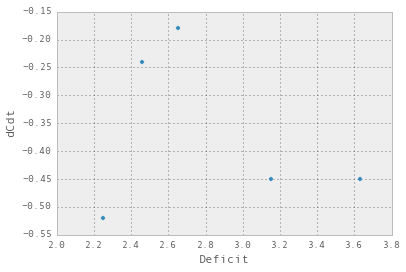

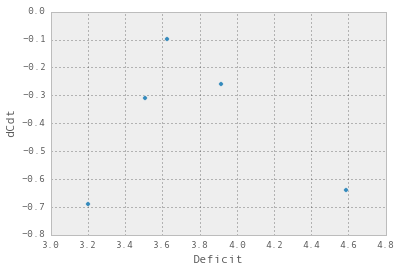

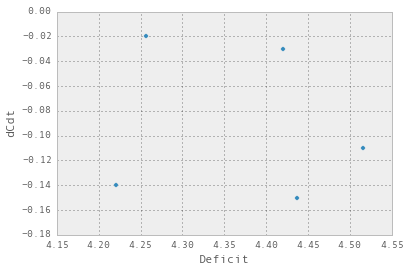

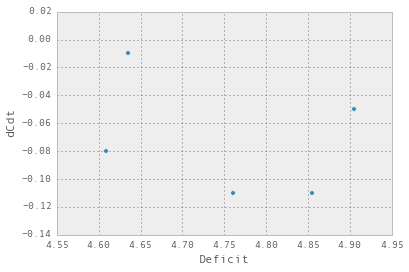

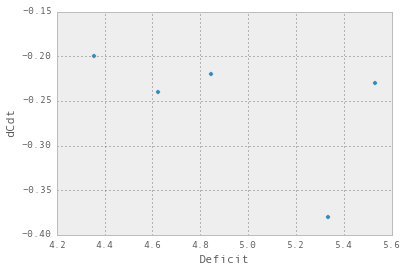

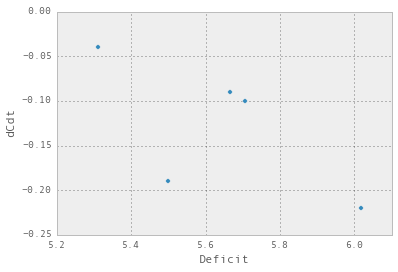

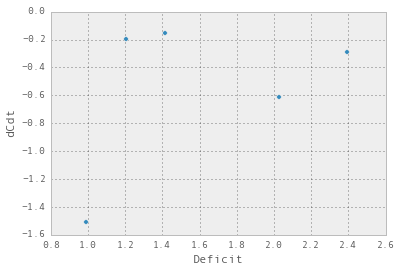

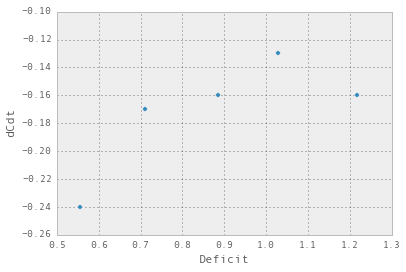

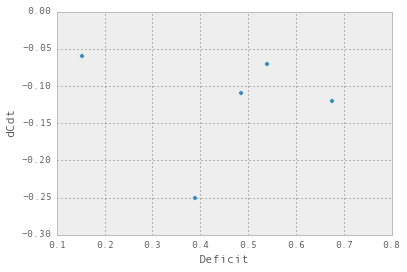

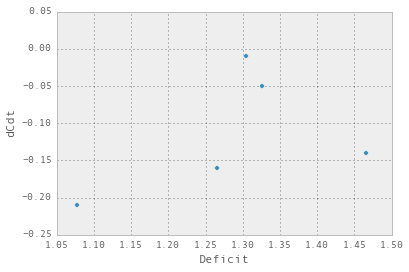

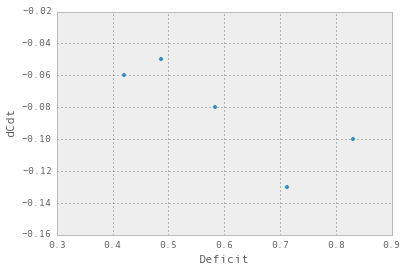

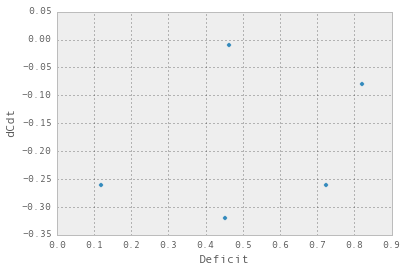

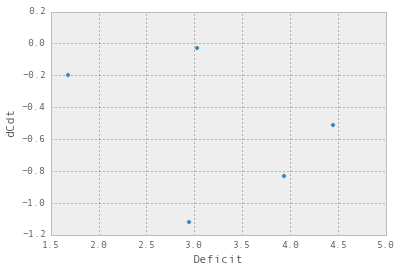

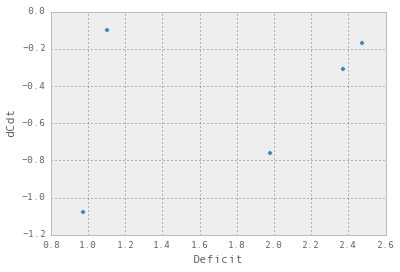

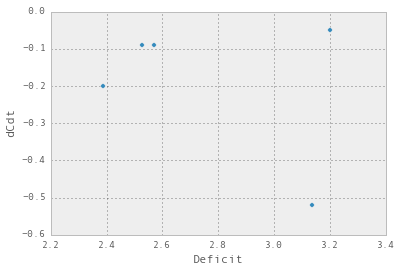

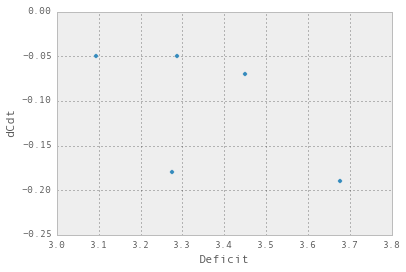

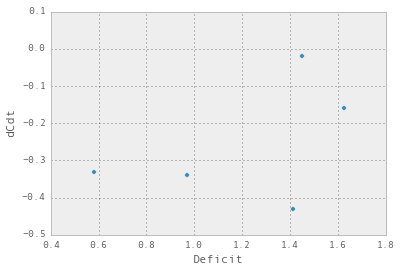

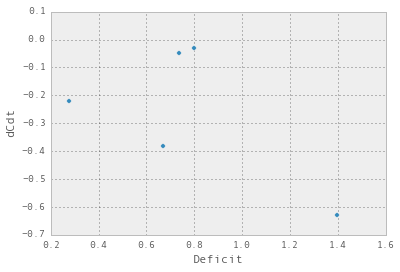

In [78]:
def plot(data_frames):
    for i in data_frames:
        i.plot(kind='scatter',x='Deficit', y ='dCdt')
        
graphs = plot(data_frames)

In [ ]:
1